<a href="https://colab.research.google.com/github/tom-ricci/2071/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
# Imports
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [205]:
# Init
image0 = Image.open("skybox.png")
image_np = np.array(image0)
image_np.shape

(780, 1340, 4)

In [206]:
# Transformation implementation
def transform(a, b, c, d, image, scaling = False):
  # PIL has an Image.transform() method, but it accepts the inverse
  # transformation of the transformation matrix provided. so, I need to
  # calculate the inverse to use it
  det = a * d - b * c
  a_inv = d / det
  b_inv = -b / det
  d_inv = -c / det
  e_inv = a / det
  # third column of the matrix is for transformations, so it's always 0
  inv_transformation = (a_inv, b_inv, 0,
                        d_inv, e_inv, 0)
  image = image.transform(image.size, Image.AFFINE, inv_transformation, resample=Image.NEAREST)
  pixels = list(image.getdata())
  # even though the pixels were transformed with the .transform() method, and as
  # a result will be scaled, the image dimensions won't be. so, i need to
  # manually find the new dimensions of the image and update it accordingly
  if(not scaling):
    return image
  bound_x = next((x for x, (r, g, b, a) in enumerate([image.getpixel((x, 0)) for x in range(image.width)]) if a == 0), image.width)
  bound_y = next((y for y, (r, g, b, a) in enumerate([image.getpixel((0, y)) for y in range(image.height)]) if a == 0), image.height)
  image = image.crop((0, 0, bound_x, bound_y))
  return image

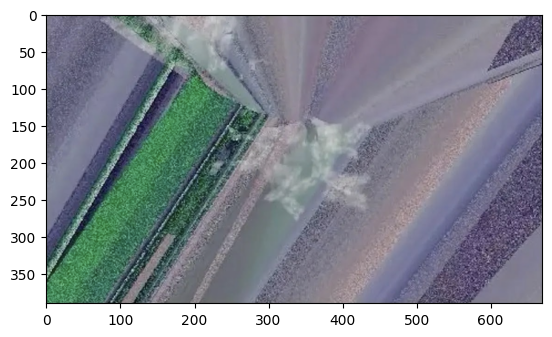

In [207]:
# T_1
a = 0.5; b = 0
c = 0; d = 0.5
image1 = transform(a, b, c, d, image0, True)
plt.imshow(image1)

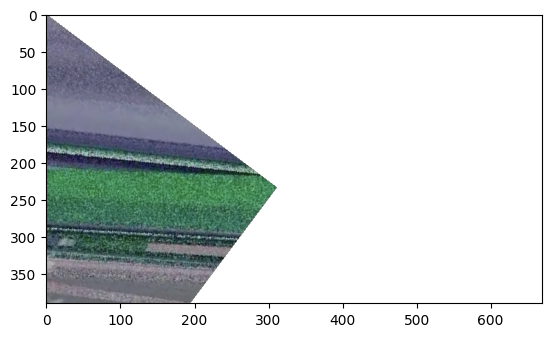

In [208]:
# T_2
a = -(3/5); b = 4/5
c = 4/5; d = 3/5
image2 = transform(a, b, c, d, image1)
plt.imshow(image2)

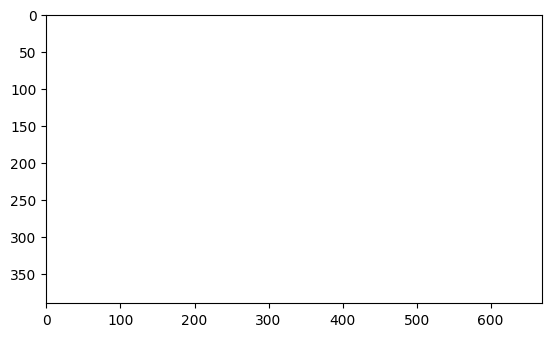

In [209]:
# T_3
a = 3/5; b = -(4/5)
c = -(4/5); d = -(3/5)
image3 = transform(a, b, c, d, image2)
plt.imshow(image3)

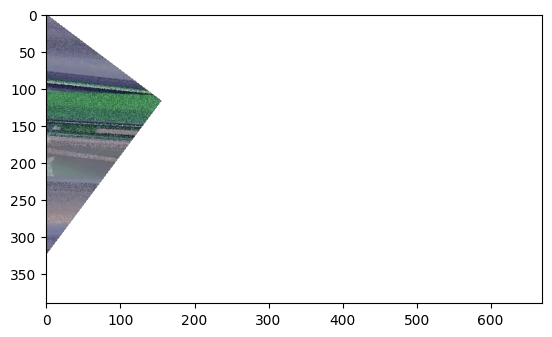

In [210]:
# T
a = -(3/10); b = 2/5
c = 2/5; d = 3/10
image1 = transform(a, b, c, d, image1)
plt.imshow(image1)

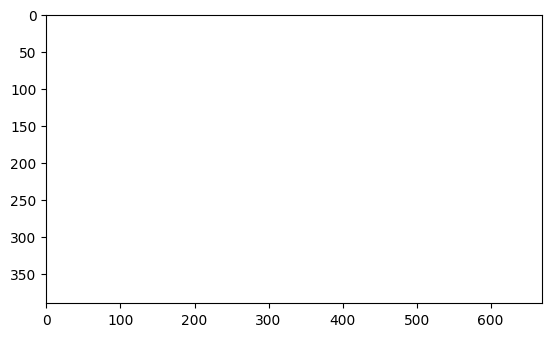

In [211]:
# T^(-1)
a = -(6/5); b = 8/5
c = 8/5; d = 6/5
image3 = transform(a, b, c, d, image3)
plt.imshow(image3)

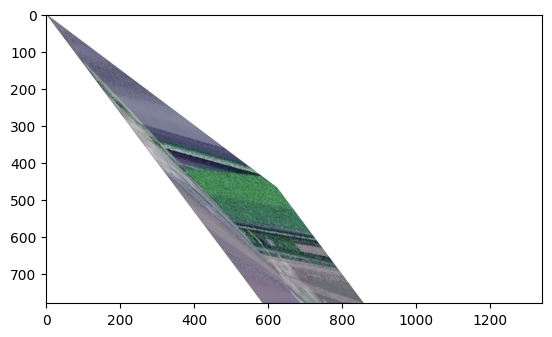

In [212]:
# F
a = 3/5; b = (4/5)
c = (4/5); d = (3/5)
image4 = transform(a, b, c, d, image0)
plt.imshow(image4)